<a href="https://colab.research.google.com/github/shreyaprabhu19/RAWS2021/blob/main/GMRT_RFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive/')
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from scipy.fft import fft
import statistics
from scipy.stats import norm

data=open('drive/My Drive/IAAC/C11_1024_Packets_B5.out','r')
line=data.readlines()
print (len(line))

Mounted at drive/
4194304


In [ ]:
voltage = []
fdata = []
for i in range(0,len(line)):
  q = line[i].split('\\')
  voltage.append(int(q[0]))

Text(0.5, 0, 'Time')

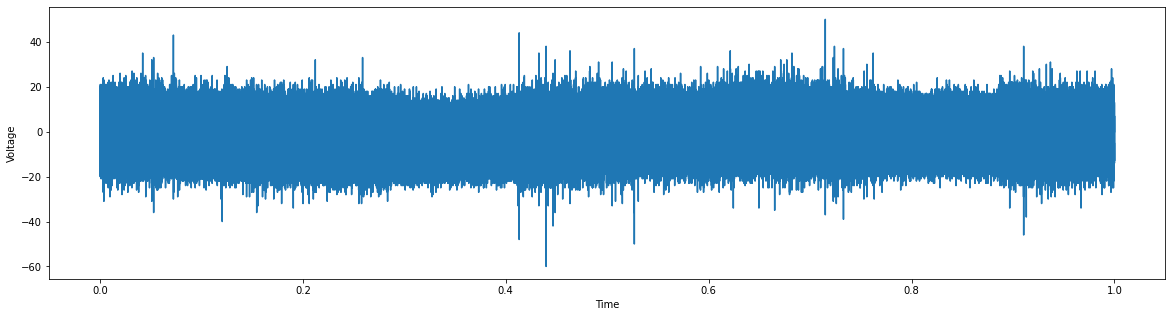

In [ ]:
x = np.linspace(0,1, 4194304)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,voltage)
ax.set_ylabel('Voltage')
ax.set_xlabel('Time')

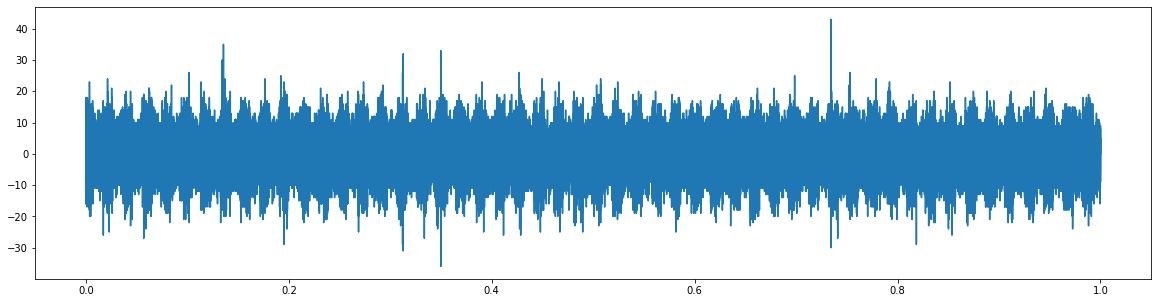

In [ ]:
y=(voltage[148000:360000])
x = np.linspace(0,1, 212000)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,y)

In [ ]:
mean = statistics.mean(voltage)
std = statistics.stdev(voltage)

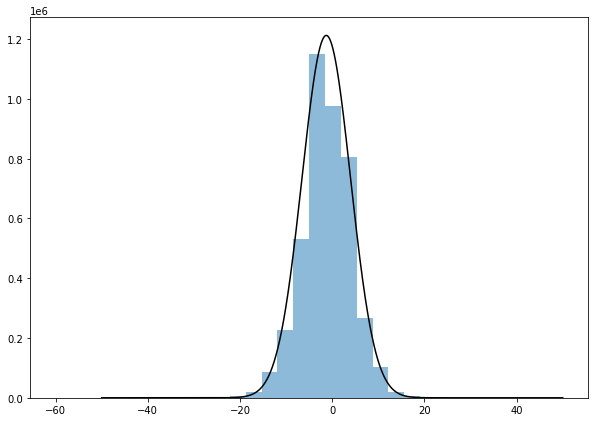

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(voltage, bins = 32, alpha = 0.5)
x = np.arange(-50,50,.01)
ax.plot(x, 1.6*(10**7)*norm.pdf(x,mean,std), color = 'k')

In [ ]:
amplitude = []
for i in voltage:
  amplitude.append((i)**2)

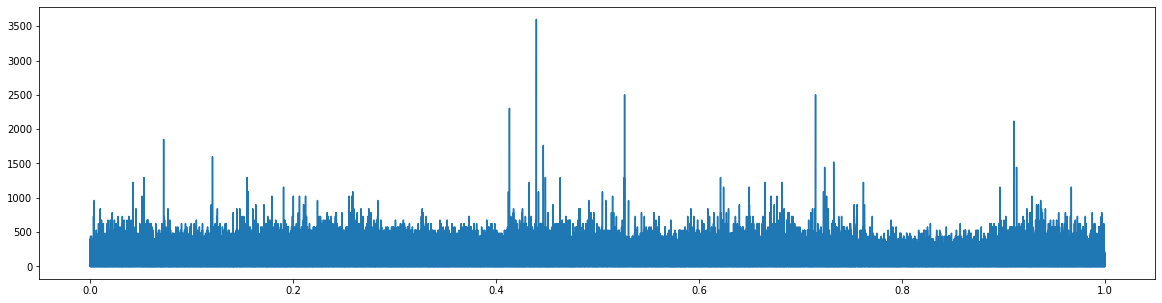

In [ ]:
x = np.linspace(0,1, 4194304)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,amplitude)

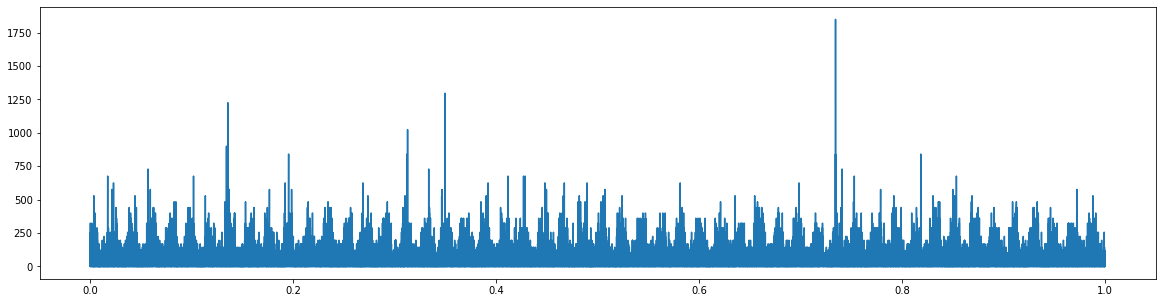

In [ ]:
y=(amplitude[148000:360000])
x = np.linspace(0,1, 212000)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,y)

In [ ]:
mean2 = statistics.mean(amplitude)
std2 = statistics.stdev(amplitude)

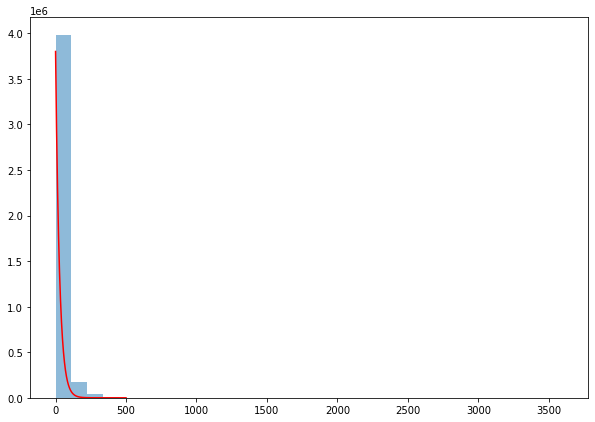

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(amplitude, bins = 32, alpha = 0.5)
x = np.linspace(0,500,500)
y = 3.8*(10**6)*np.exp(-x/(std**2))
plt.plot(x, y, color='r')

In [ ]:
tempdata = []
fdata = []
trdata = []
i = 0
for j in range(0, 1024):
  tempdata = []
  tempdata.append(voltage[i:i+4096])
  trdata =abs(fft(tempdata)*np.conj(fft(tempdata)))
  x= trdata.flatten()
  i = i+4096
  # print(type(x))
  # print(x[0])
  fdata.append(x[0:2048])
type(trdata)

numpy.ndarray

Text(0.5, 1.0, 'Auto correlation mean spectrum for C11(band-5)')

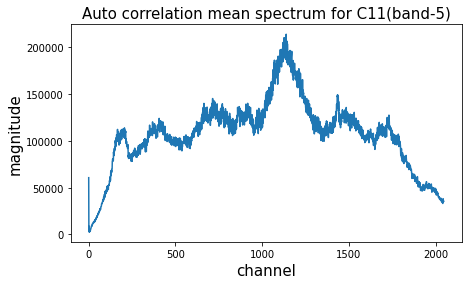

In [ ]:
tempdata = np.zeros(2048)
# j =0
for i in fdata:
  tempdata = tempdata + i
ave_sp = tempdata/1024
x = np.linspace(0,2047,2047)
y = ave_sp[1:2048]
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_ylabel('magnitude',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('Auto correlation mean spectrum for C11(band-5)', fontsize = 15)

In [ ]:
numpy_array = np.array(fdata)
transpose = numpy_array.T

transpose_fdata = transpose.tolist()

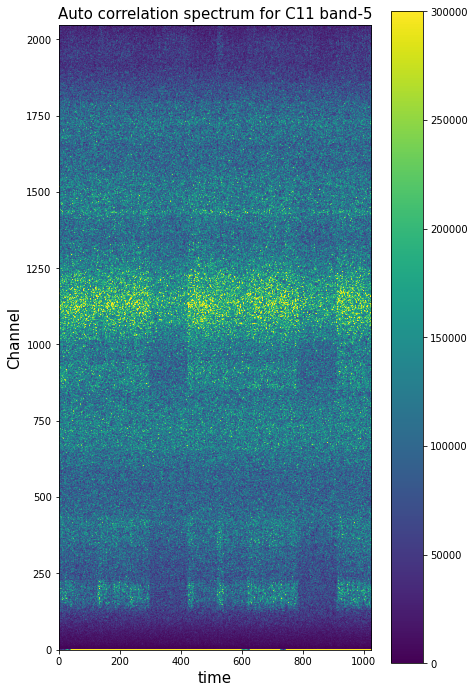

In [ ]:
from matplotlib.pyplot import cm
fig = plt.figure(figsize=(7,12))
ax = fig.add_subplot(111)
# ax.imshow(transpose_fdata)
ax.invert_yaxis()
ax.set_ylabel('Channel',fontsize = 15)
ax.set_xlabel('time',fontsize = 15)
plt.title('Auto correlation spectrum for C11 band-5', fontsize = 15)
spec = ax.imshow(transpose_fdata, vmin = 0, vmax = 3*10**5)
ax.invert_yaxis()
plt.colorbar(spec,orientation='vertical')
# plt.clim(0, 1.5*10**8)
# cbar.set_label('Title (Unit)')

In [ ]:
r = []
for i in transpose_fdata:
  mean = 0
  rms = 0
  sum = 0
  tot = 0
  for j in i:
    sum = sum + j
    tot = tot + j**2
  tot = tot/1024
  mean = sum/1024
  rms=(math.sqrt(tot))
  r.append(math.sqrt(2)*mean/rms)


Text(0.5, 1.0, 'For C11 band-5')

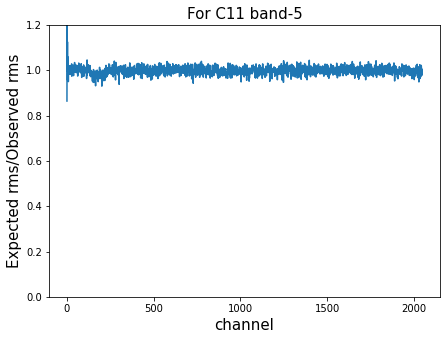

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
x = np.linspace(0,2048,2048)
ax.plot(x,r)
ax.set_ylim(0,1.2)
ax.set_ylabel('Expected rms/Observed rms',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('For C11 band-5', fontsize = 15)

In [ ]:
c11 = []
j = 0
for i in r:
  if i > 1.1 or i < 0.9:
    c11.append(j)
  j = j + 1
c11

[0, 1, 3]

In [ ]:
data=open('drive/My Drive/IAAC/C12_1024_Packets_B5.out','r')
line=data.readlines()
print (len(line))

4194304


In [ ]:
voltage2 = []
fdata = []
for i in range(0,len(line)):
  q = line[i].split('\\')
  voltage2.append(int(q[0]))

Text(0.5, 0, 'Time')

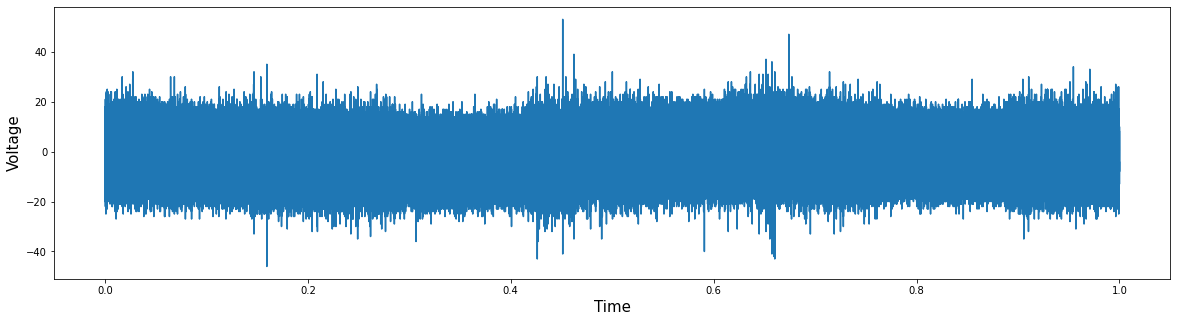

In [ ]:
x = np.linspace(0,1, 4194304)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,voltage2)
ax.set_ylabel('Voltage',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)

Text(0.5, 0, 'Time')

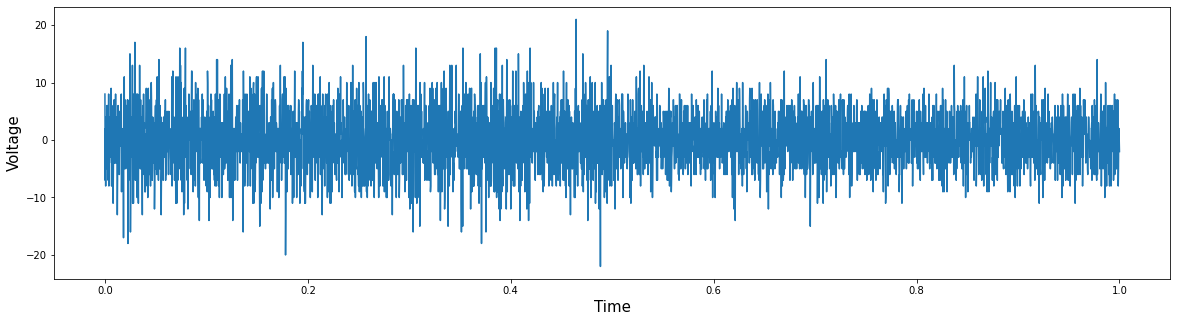

In [ ]:
y=(voltage2[0:4096])
x = np.linspace(0,1, 4096)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_ylabel('Voltage',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)

In [ ]:
mean2 = statistics.mean(voltage2)
std2 = statistics.stdev(voltage2)

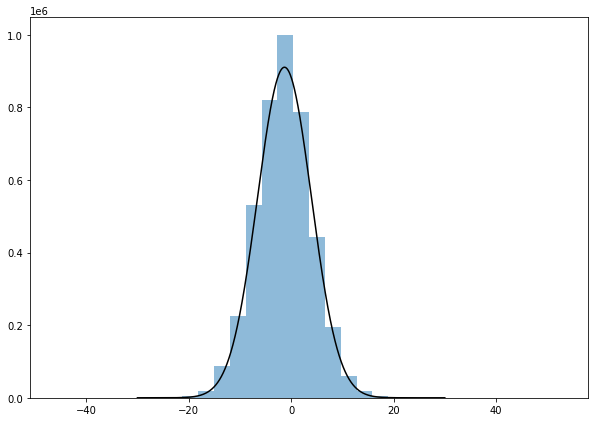

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(voltage2, bins = 32, alpha = 0.5)
x = np.arange(-30,30,.01)
ax.plot(x, 12*(10**6)*norm.pdf(x,mean2,std2), color = 'k')

In [ ]:
amplitude2 = []
for i in voltage2:
  amplitude2.append((i)**2)

Text(0.5, 0, 'Time')

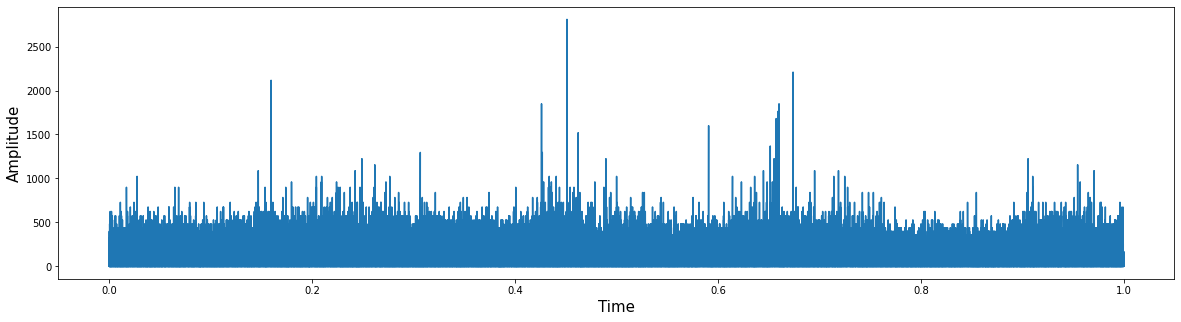

In [ ]:
x = np.linspace(0,1, 4194304)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,amplitude2)
ax.set_ylabel('Amplitude',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)

Text(0.5, 0, 'Time')

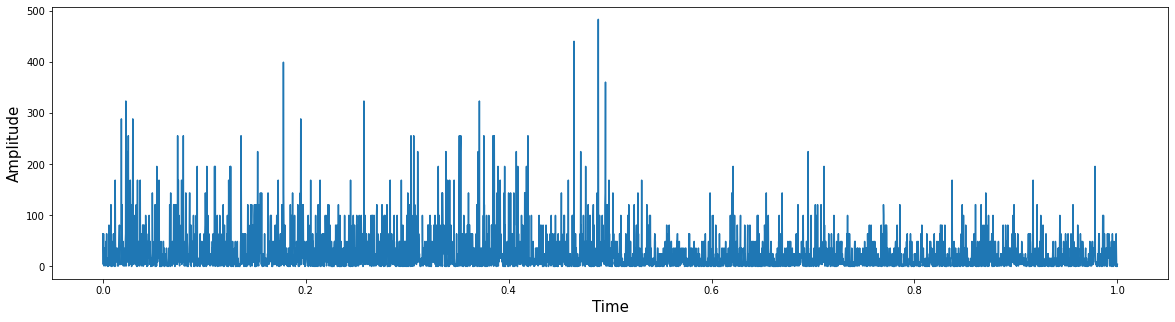

In [ ]:
y=(amplitude2[0:4096])
x = np.linspace(0,1, 4096)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_ylabel('Amplitude',fontsize = 15)
ax.set_xlabel('Time',fontsize = 15)

In [ ]:
mean = statistics.mean(amplitude2)
std = statistics.stdev(amplitude2)

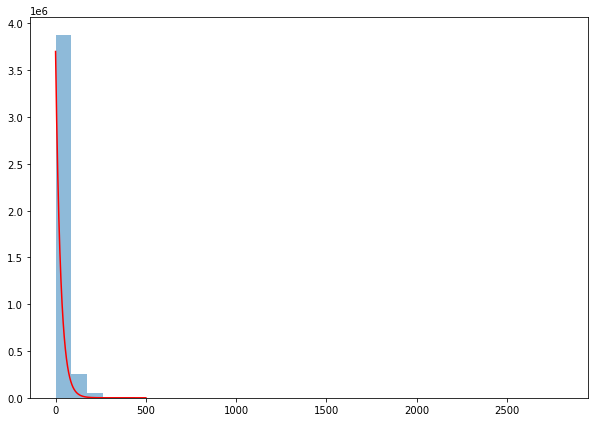

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(amplitude2, bins = 32, alpha = 0.5)
x = np.linspace(0,500,500)
y = 3.7*(10**6)*np.exp(-x/(std2**2))
plt.plot(x, y, color='r')

In [ ]:
tempdata = []
fdata2 = []
trdata = []
i = 0
for j in range(0, 1024):
  tempdata = []
  tempdata.append(voltage2[i:i+4096])
  trdata =abs(fft(tempdata)*np.conj(fft(tempdata)))
  x= trdata.flatten()
  i = i+4096
  # print(type(x))
  # print(x[0])
  fdata2.append(x[0:2048])
type(trdata)

numpy.ndarray

Text(0.5, 1.0, 'Aouto correlation mean spectrum for C12(band-5)')

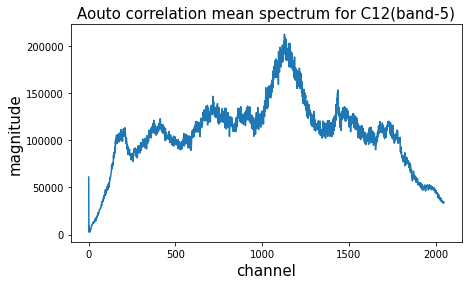

In [ ]:
tempdata = np.zeros(2048)
# j =0
for i in fdata2:
  tempdata = tempdata + i
ave_sp2 = tempdata/1024
x = np.linspace(0,2047,2047)
y = ave_sp2[1:2048]
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_ylabel('magnitude',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('Aouto correlation mean spectrum for C12(band-5)', fontsize = 15)

In [ ]:
numpy_array = np.array(fdata2)
transpose = numpy_array.T

transpose_fdata2 = transpose.tolist()

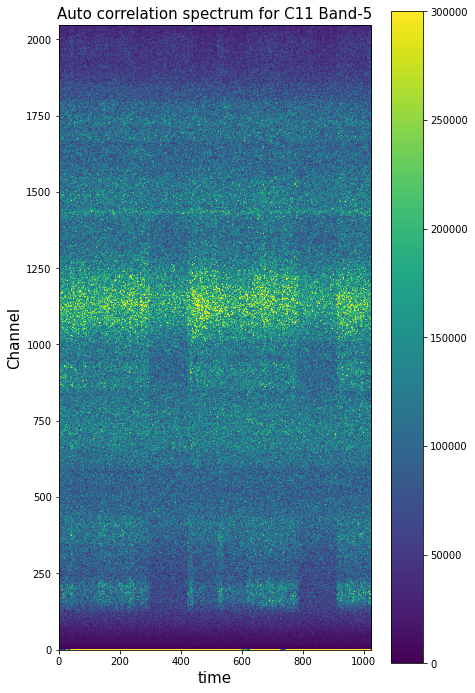

In [ ]:
from matplotlib.pyplot import cm
fig = plt.figure(figsize=(7,12))
ax = fig.add_subplot(111)
# ax.imshow(transpose_fdata2)
ax.invert_yaxis()
ax.set_ylabel('Channel',fontsize = 15)
ax.set_xlabel('time',fontsize = 15)
plt.title('Auto correlation spectrum for C11 Band-5', fontsize = 15)
spec = ax.imshow(transpose_fdata2, vmin = 0, vmax = 3*10**5)
ax.invert_yaxis()
plt.colorbar(spec,orientation='vertical')
# plt.clim(0, 1.5*10**8)
# cbar.set_label('Title (Unit)')

In [ ]:
r2 = []
for i in transpose_fdata2:
  mean = 0
  rms = 0
  sum = 0
  tot = 0
  for j in i:
    sum = sum + j
    tot = tot + j**2
  tot = tot/1024
  mean = sum/1024
  rms=(math.sqrt(tot))
  r2.append(math.sqrt(2)*mean/rms)


Text(0.5, 1.0, 'Auto correlation Expected rms/observed rms vs channel(C12 Band-5)')

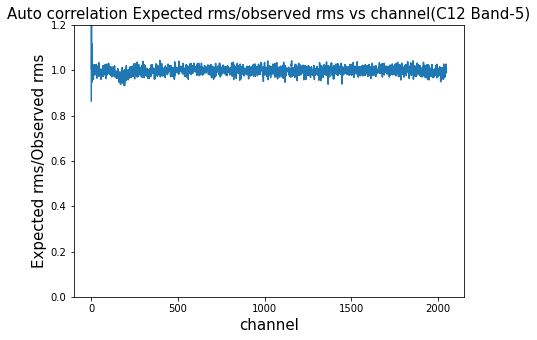

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
x = np.linspace(0,2048,2048)
ax.plot(x,r2)
ax.set_ylim(0,1.2)
ax.set_ylabel('Expected rms/Observed rms',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('Auto correlation Expected rms/observed rms vs channel(C12 Band-5)', fontsize = 15)

In [ ]:
c12 = []
j = 0
for i in r2:
  if i > 1.1 or i < 0.9:
    c12.append(j)
  j = j + 1
c12

[0, 1, 3]

In [ ]:

#for cross correlation of band-3 and 5 for C11 (0 for cross correlation)


fdata0 = []
trdata = []
i = 0
for j in range(0, 1024):
  tempdata1 = []
  tempdata2 = []
  tempdata2.append(voltage2[i:i+4096])
  tempdata1.append(voltage[i:i+4096])
  trdata =abs(fft(tempdata1)*np.conj(fft(tempdata2)))
  x= trdata.flatten()
  i = i+4096
  # print(type(x))
  # print(x[0])
  fdata0.append(x[0:2048])
type(trdata)

numpy.ndarray

Text(0.5, 1.0, 'Cross correlation mean spectrum for C11 and C12(band-5)')

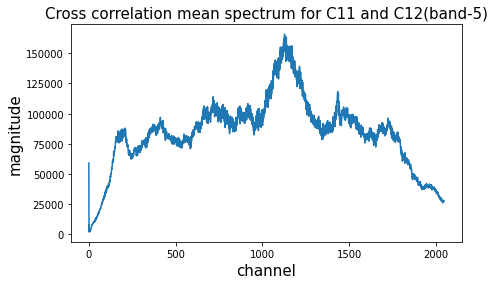

In [ ]:
tempdata = np.zeros(2048)
# j =0
for i in fdata0:
  tempdata = tempdata + i
ave_sp0 = tempdata/1024
x = np.linspace(0,2047,2047)
y = ave_sp0[1:2048]
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.set_ylabel('magnitude',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('Cross correlation mean spectrum for C11 and C12(band-5)', fontsize = 15)

In [ ]:
numpy_array = np.array(fdata0)
transpose = numpy_array.T

transpose_fdata0 = transpose.tolist()

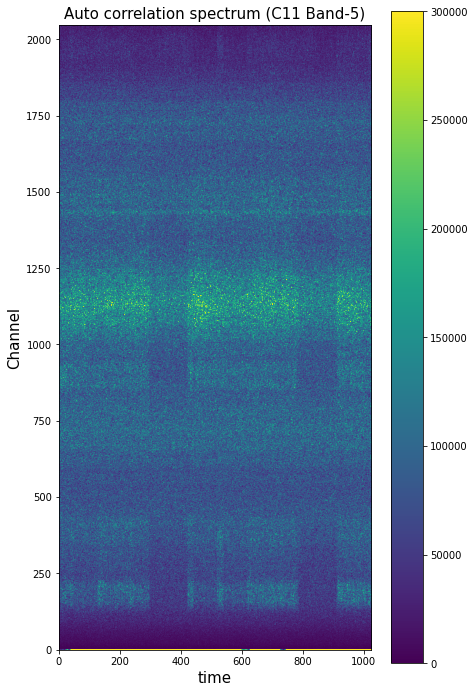

In [ ]:
from matplotlib.pyplot import cm
fig = plt.figure(figsize=(7,12))
ax = fig.add_subplot(111)
# ax.imshow(transpose_fdata2)
ax.invert_yaxis()
ax.set_ylabel('Channel',fontsize = 15)
ax.set_xlabel('time',fontsize = 15)
plt.title('Auto correlation spectrum (C11 Band-5)', fontsize = 15)
spec = ax.imshow(transpose_fdata0, vmin = 0, vmax = 3*10**5)
ax.invert_yaxis()
plt.colorbar(spec,orientation='vertical')

In [ ]:
r0 = []
for i in transpose_fdata0:
  mean = 0
  rms = 0
  sum = 0
  tot = 0
  for j in i:
    sum = sum + j
    tot = tot + j**2
  tot = tot/1024
  mean = sum/1024
  rms=(math.sqrt(tot))
  r0.append(math.sqrt(2)*mean/rms)

Text(0.5, 1.0, 'Corss correlation Expected rms/observed rms vs channel(C11 and C12 Band-5)')

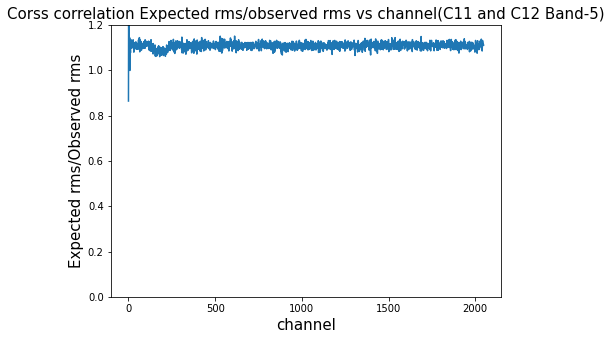

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
x = np.linspace(0,2048,2048)
ax.plot(x,r0)
ax.set_ylim(0,1.2)
ax.set_ylabel('Expected rms/Observed rms',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('Corss correlation Expected rms/observed rms vs channel(C11 and C12 Band-5)', fontsize = 15)

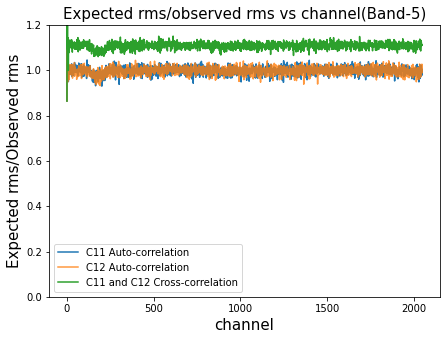

In [ ]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
x = np.linspace(0,2048,2048)
ax.plot(x,r, label = 'C11 Auto-correlation')
ax.plot(x,r2, label = 'C12 Auto-correlation', alpha = 0.8)
ax.plot(x,r0, label = 'C11 and C12 Cross-correlation')
ax.set_ylim(0,1.2)
ax.set_ylabel('Expected rms/Observed rms',fontsize = 15)
ax.set_xlabel('channel',fontsize = 15)
plt.title('Expected rms/observed rms vs channel(Band-5)', fontsize = 15)
ax.legend()

In [ ]:
a = [58.917, 87.415, 63.337]
statistics.stdev(a)

15.337440507898748